# **Grupo**

* Bruno Santos - bfss@cesar.school
* Caio Guedes - ccsg@cesar.school

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

import seaborn as sns
import pandas as pd
import numpy as np

###Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv")

In [ ]:
df.head(10)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,...,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,...,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,...,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [ ]:
df.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


In [ ]:
colunas_valor_interrogacao = df.columns[df.isin(['?']).any()].tolist()

print("Colunas com o valor '?':", colunas_valor_interrogacao)

Colunas com o valor '?': ['GImg3', 'PImg5', 'Authoritative -anarchic ']


In [ ]:
colunas = ['GImg3', 'PImg5', 'Authoritative -anarchic ']

for column in colunas:
    print(f"Valores únicos na coluna '{column}':")
    print(df[column].value_counts(), "\n")

Valores únicos na coluna 'GImg3':
GImg3
likes         41
indiferent    19
dislikes      12
?              1
Name: count, dtype: int64 

Valores únicos na coluna 'PImg5':
PImg5
dislikes      70
?              2
indiferent     1
Name: count, dtype: int64 

Valores únicos na coluna 'Authoritative -anarchic ':
Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
?      1
Name: count, dtype: int64 



In [ ]:
print(f"Valores únicos na coluna Type of Client: ")
print(df['Type of Client'].value_counts(), "\n")

Valores únicos na coluna Type of Client: 
Type of Client
2    36
4    14
3    10
0     5
1     4
5     4
Name: count, dtype: int64 



###Tratamento dos dados

Abaixo trate os valores "?" presente em algumas colunas. Use a estratégia que for mais confortável.

Dica: Use a função `replace`.

In [ ]:
# Tem ? em 3 colunas: 'GImg3', 'PImg5', 'Authoritative -anarchic '\
# Trocamos nas colunas GImg3 e PImg5 pelas modas, já que são textos
# Na 3a coluna colocamos a mediana, que é 4, já que são só inteiros

In [ ]:
# Substituindo "?" por valores apropriados em cada coluna
df['GImg3'].replace("?", "likes", inplace=True)
df['PImg5'].replace("?", "dislikes", inplace=True)
df['Authoritative -anarchic '].replace("?", 4, inplace=True)

<ipython-input-175-38c0351ac184>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GImg3'].replace("?", "likes", inplace=True)
<ipython-input-175-38c0351ac184>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
# Verificando se os valores foram substituídos corretamente
print(df['GImg3'].value_counts(), "\n")
print(df['PImg5'].value_counts(), "\n")
print(df['Authoritative -anarchic '].value_counts())

GImg3
likes         42
indiferent    19
dislikes      12
Name: count, dtype: int64 

PImg5
dislikes      72
indiferent     1
Name: count, dtype: int64 

Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
4      1
Name: count, dtype: int64


A seguir substitua os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos definidos por você.

Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [ ]:
# Verificando antes
print(df[['returning', 'sex', 'GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5']].head())

  returning sex       GImg1       GImg2       GImg3  PImg1  PImg2       PImg3  \
0        no   F       likes  indiferent  indiferent  likes  likes  indiferent   
1        no   M       likes  indiferent  indiferent  likes  likes       likes   
2        no   F  indiferent  indiferent  indiferent  likes  likes  indiferent   
3        no   M       likes    dislikes    dislikes  likes  likes  indiferent   
4        no   M  indiferent  indiferent  indiferent  likes  likes  indiferent   

        PImg4     PImg5  
0  indiferent  dislikes  
1       likes  dislikes  
2       likes  dislikes  
3  indiferent  dislikes  
4       likes  dislikes  


In [ ]:
# Verificando antes
print(df[['TAudio1', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics']].head())

  TAudio1   TAudio2   TAudio3     QAudio1     QAudio2     QAudio3 Proxemics
0       C  dislikes  dislikes  indiferent    dislikes    dislikes  dislikes
1       B  dislikes  dislikes       likes       likes    dislikes  dislikes
2       C  dislikes  dislikes       likes    dislikes    dislikes  dislikes
3       C  dislikes  dislikes       likes    dislikes  indiferent  dislikes
4       C  dislikes  dislikes       likes  indiferent    dislikes  dislikes


In [ ]:
# Mapeamento
# Returning no: 0
# Returning yes: 1

# Male: 0
# Female: 1

# Dislike = 0
# Indiferente = 1
# Likes = 2

# TAudio
# A: 0
# B: 1
# C: 2
# D: 3

In [ ]:
# Mapeamento dos valores categóricos para numéricos
returning_mapping = {'no': 0, 'yes': 1}
sex_mapping = {'M': 0, 'F': 1}
img_mapping = {'dislikes': 0, 'indiferent': 1, 'likes': 2}
taudio_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Aplicando as substituições
df['returning'] = df['returning'].map(returning_mapping)
df['sex'] = df['sex'].map(sex_mapping)
df['GImg1'] = df['GImg1'].map(img_mapping)
df['GImg2'] = df['GImg2'].map(img_mapping)
df['GImg3'] = df['GImg3'].map(img_mapping)
df['PImg1'] = df['PImg1'].map(img_mapping)
df['PImg2'] = df['PImg2'].map(img_mapping)
df['PImg3'] = df['PImg3'].map(img_mapping)
df['PImg4'] = df['PImg4'].map(img_mapping)
df['PImg5'] = df['PImg5'].map(img_mapping)
df['TAudio1'] = df['TAudio1'].map(taudio_mapping)
df['TAudio2'] = df['TAudio2'].map(img_mapping)
df['TAudio3'] = df['TAudio3'].map(img_mapping)
df['QAudio1'] = df['QAudio1'].map(img_mapping)
df['QAudio2'] = df['QAudio2'].map(img_mapping)
df['QAudio3'] = df['QAudio3'].map(img_mapping)
df['Proxemics'] = df['Proxemics'].map(img_mapping)

In [ ]:
# Verificando os resultados
print(df[['returning', 'sex', 'GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5']].head())

   returning  sex  GImg1  GImg2  GImg3  PImg1  PImg2  PImg3  PImg4  PImg5
0          0    1      2      1      1      2      2      1      1      0
1          0    0      2      1      1      2      2      2      2      0
2          0    1      1      1      1      2      2      1      2      0
3          0    0      2      0      0      2      2      1      1      0
4          0    0      1      1      1      2      2      1      2      0


In [ ]:
# Verificando os resultados
print(df[['TAudio1', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics']].head())

   TAudio1  TAudio2  TAudio3  QAudio1  QAudio2  QAudio3  Proxemics
0        2        0        0        1        0        0          0
1        1        0        0        2        2        0          0
2        2        0        0        2        0        0          0
3        2        0        0        2        0        1          0
4        2        0        0        2        1        0          0


Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Pode utilizar a matriz de correlação para selecionar ou remover features. Justifique a remoção de colunas caso ocoram.

In [ ]:
df['Authoritative -anarchic '] = df['Authoritative -anarchic '].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     int64 
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     int64 
 4   GImg1                     73 non-null     int64 
 5   GImg2                     73 non-null     int64 
 6   GImg3                     73 non-null     int64 
 7   PImg1                     73 non-null     int64 
 8   PImg2                     73 non-null     int64 
 9   PImg3                     73 non-null     int64 
 10  PImg4                     73 non-null     int64 
 11  PImg5                     73 non-null     int64 
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     int64 
 14  Hostile - friendly        73

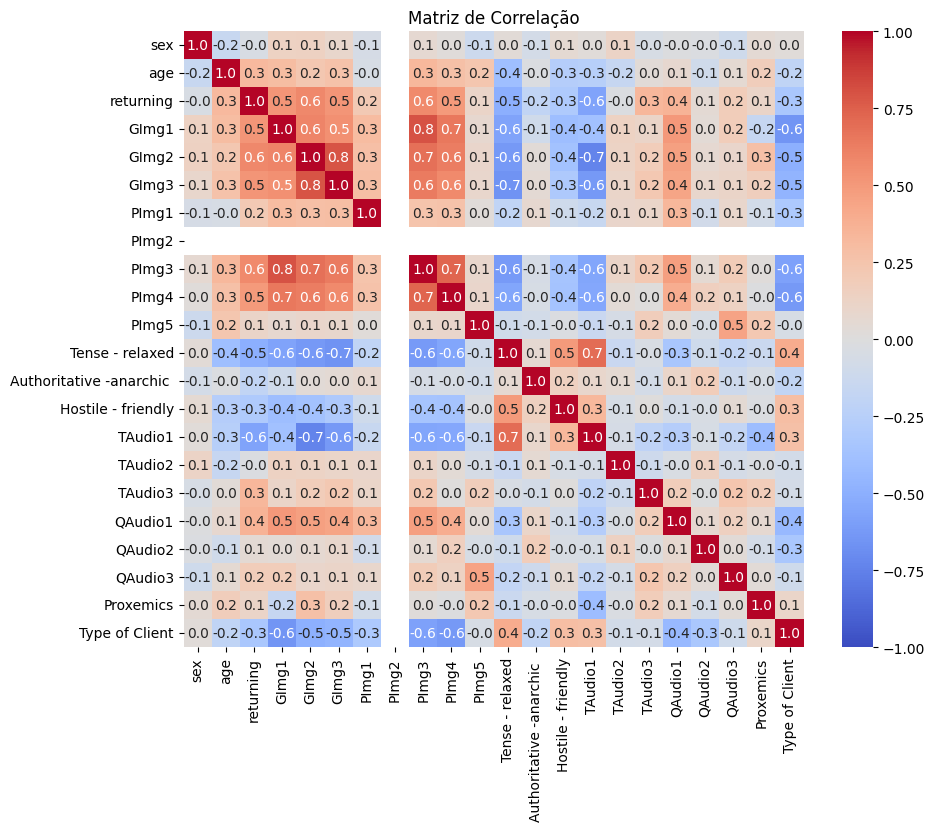

In [ ]:
# Heatmap
df_numerico = df.drop(columns=['country']).copy()
corr_matrix = df_numerico.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
df.drop(columns='PImg2', inplace=True)

Com isso, percebemos que PImg2 possui o mesmo valor sempre: 'likes', podendo ser deletada sem impactos.

Faça as demais transformações que julgar necessárias na base de dados.

In [ ]:
df.drop(columns=['country', 'age'], inplace=True)

In [ ]:
df.head()

,sex,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,1,0,2,1,1,2,1,1,0,4,8,3,2,0,0,1,0,0,0,0
1,0,0,2,1,1,2,2,2,0,2,9,1,1,0,0,2,2,0,0,0
2,1,0,1,1,1,2,1,2,0,5,10,5,2,0,0,2,0,0,0,0
3,0,0,2,0,0,2,1,1,0,3,2,1,2,0,0,2,0,1,0,0
4,0,0,1,1,1,2,1,2,0,3,9,3,2,0,0,2,1,0,0,0


###Separação treino/teste

Separe os valores e os rótulos da base de dados.

In [ ]:
X = df.drop('Type of Client', axis=1)
y = df['Type of Client']

## Escolhendo as 10 features com correlação mais forte

In [ ]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Features selecionadas:")
print(selected_features)

#novo df com as features selecionadas
X_selected = pd.DataFrame(X_new, columns=selected_features)

Features selecionadas:
Index(['returning', 'GImg1', 'GImg2', 'GImg3', 'PImg3', 'PImg4',
       'Tense - relaxed', 'TAudio1', 'QAudio1', 'QAudio2'],
      dtype='object')


In [ ]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   returning        73 non-null     int64
 1   GImg1            73 non-null     int64
 2   GImg2            73 non-null     int64
 3   GImg3            73 non-null     int64
 4   PImg3            73 non-null     int64
 5   PImg4            73 non-null     int64
 6   Tense - relaxed  73 non-null     int64
 7   TAudio1          73 non-null     int64
 8   QAudio1          73 non-null     int64
 9   QAudio2          73 non-null     int64
dtypes: int64(10)
memory usage: 5.8 KB


Separe a base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

##k-NN

Instancie e treine a k-NN com diversos valores para os vizinhos. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
knn_2 = neighbors.KNeighborsClassifier(n_neighbors = 2)
knn_2.fit(X_train, y_train)
y_pred_2 = knn_2.predict(X_test)

In [ ]:
knn_2.score(X_test, y_test)

0.7894736842105263

In [ ]:
knn_3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)

In [ ]:
knn_3.score(X_test, y_test)

0.6842105263157895

In [ ]:
knn_4 = neighbors.KNeighborsClassifier(n_neighbors = 4)
knn_4.fit(X_train, y_train)
y_pred_4 = knn_4.predict(X_test)

In [ ]:
knn_4.score(X_test, y_test)

0.7368421052631579

In [ ]:
knn_5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)

In [ ]:
knn_5.score(X_test, y_test)

0.8421052631578947

Otimizar o valor de K
- Ache o melhor valor de k para o algoritmo k-NN. Utilize o intervalo de 1 a 30.

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29


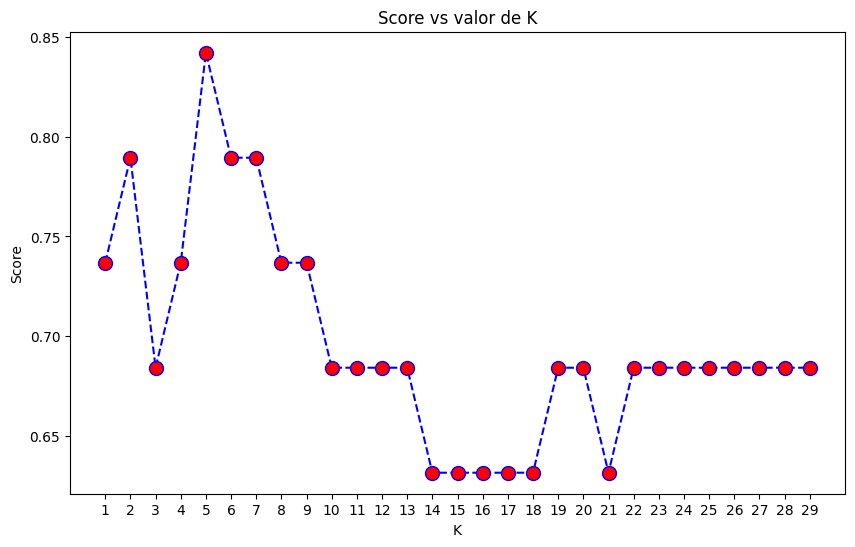

In [ ]:
score = []

for i in range(1,30):
  ## treine o modelo
  knn_plot = neighbors.KNeighborsClassifier(n_neighbors=i) # Initialize the model within the loop
  knn_plot.fit(X_train, y_train) # Use knn_plot to fit the model
  ## calcule as métricas
  s = knn_plot.score(X_test, y_test) # Use knn_plot to calculate the score
  ## armazene na lista score
  score.append(s)
  print("k=", i)

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)

plt.xticks(range(1, 30, 1))
plt.title('Score vs valor de K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

Com isso , vimos que o melhor número de vizinhos é o 5.

Plote a matriz de confusão.

<Figure size 1600x1200 with 0 Axes>

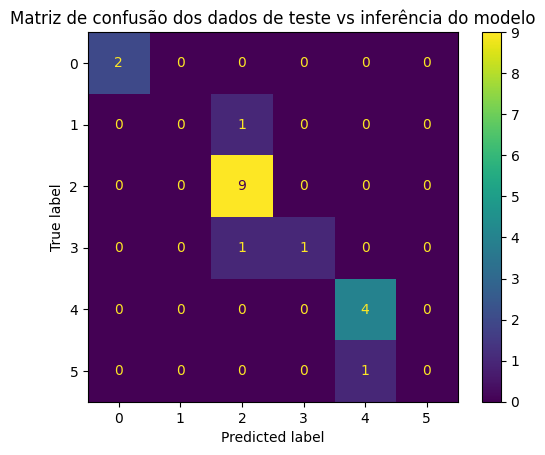

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_5)
classes = np.unique(y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

Exiba as métricas do classification report.

In [ ]:
class_report = classification_report(y_test, y_pred_5)
print("\nRelatório de Classificação:")
print(class_report)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           2       0.82      1.00      0.90         9
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         1

    accuracy                           0.84        19
   macro avg       0.60      0.58      0.58        19
weighted avg       0.77      0.84      0.79        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##PCA

In [ ]:
num_features = X.shape[1]
print(f"{num_features} features no dataset.")

19 features no dataset.


In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Inicializando o modelo KNN
knn = KNeighborsClassifier()

### 15 features

In [ ]:
pca_15 = PCA(n_components=15)

In [ ]:
X_train_pca_15 = pca_15.fit_transform(X_train_pca)
X_test_pca_15 = pca_15.transform(X_test_pca)

In [ ]:
# Treinando e testando o modelo nos dados transformados com 15 componentes
knn.fit(X_train_pca_15, y_train_pca)

KNeighborsClassifier()

In [ ]:
y_pred_pca_15 = knn.predict(X_test_pca_15)

In [ ]:
accuracy_pca_15 = accuracy_score(y_test, y_pred_pca_15)
print(f"Accuracy com 15 componentes PCA: {accuracy_pca_15}")

Accuracy com 15 componentes PCA: 0.6842105263157895


k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29


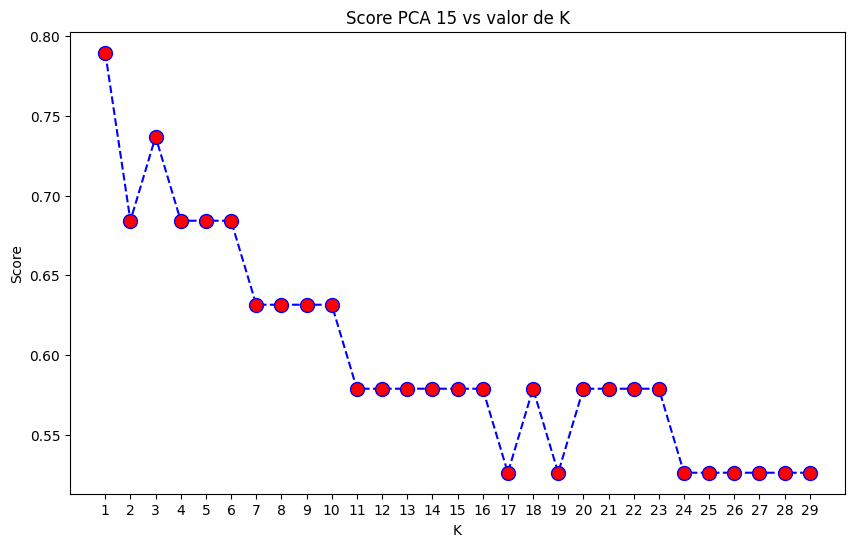

In [ ]:
score_pca_15 = []

for i in range(1,30):
  ## treine o modelo
  knn_plot = neighbors.KNeighborsClassifier(n_neighbors=i) # Initialize the model within the loop
  knn_plot.fit(X_train_pca_15, y_train_pca) # Use knn_plot to fit the model
  ## calcule as métricas
  s = knn_plot.score(X_test_pca_15, y_test_pca) # Use knn_plot to calculate the score
  ## armazene na lista score
  score_pca_15.append(s)
  print("k=", i)

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score_pca_15, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)

plt.xticks(range(1, 30, 1))
plt.title('Score PCA 15 vs valor de K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### 10 features

In [ ]:
pca_10 = PCA(n_components=10)

In [ ]:
X_train_pca_10 = pca_10.fit_transform(X_train_pca)
X_test_pca_10 = pca_10.transform(X_test_pca)

In [ ]:
# Treinando e testando o modelo nos dados transformados com 10 componentes
knn.fit(X_train_pca_10, y_train_pca)

KNeighborsClassifier()

In [ ]:
y_pred_pca_10 = knn.predict(X_test_pca_10)

In [ ]:
accuracy_pca_10 = accuracy_score(y_test, y_pred_pca_10)
print(f"Accuracy com 10 componentes PCA: {accuracy_pca_10}")

Accuracy com 10 componentes PCA: 0.6842105263157895


k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29


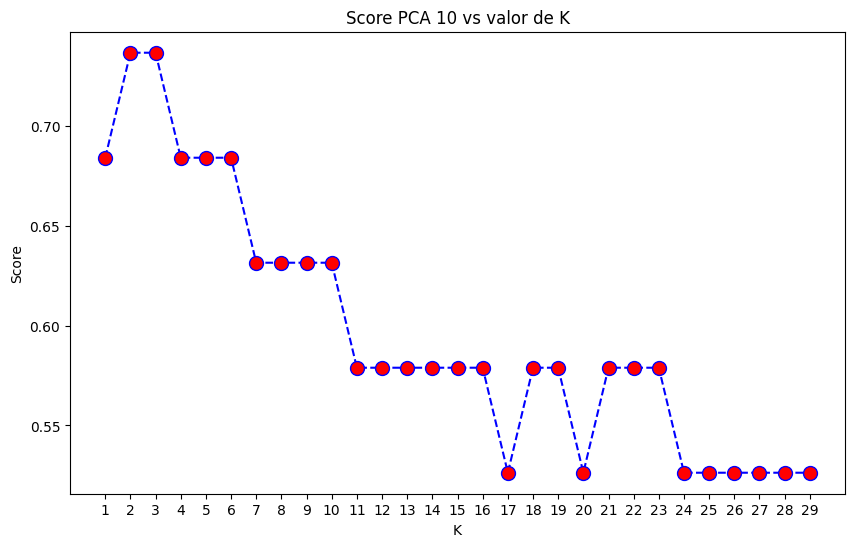

In [ ]:
score_pca_10 = []

for i in range(1,30):
  ## treine o modelo
  knn_plot = neighbors.KNeighborsClassifier(n_neighbors=i) # Initialize the model within the loop
  knn_plot.fit(X_train_pca_10, y_train_pca) # Use knn_plot to fit the model
  ## calcule as métricas
  s = knn_plot.score(X_test_pca_10, y_test_pca) # Use knn_plot to calculate the score
  ## armazene na lista score
  score_pca_10.append(s)
  print("k=", i)

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score_pca_10, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)

plt.xticks(range(1, 30, 1))
plt.title('Score PCA 10 vs valor de K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### 5 features

In [ ]:
pca_5 = PCA(n_components=5)

In [ ]:
X_train_pca_5 = pca_5.fit_transform(X_train_pca)
X_test_pca_5 = pca_5.transform(X_test_pca)

In [ ]:
# Treinando e testando o modelo nos dados transformados com 5 componentes
knn.fit(X_train_pca_5, y_train_pca)

KNeighborsClassifier()

In [ ]:
y_pred_pca_5 = knn.predict(X_test_pca_5)

In [ ]:
accuracy_pca_5 = accuracy_score(y_test, y_pred_pca_5)
print(f"Accuracy com 5 componentes PCA: {accuracy_pca_5}")

Accuracy com 5 componentes PCA: 0.631578947368421


k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29


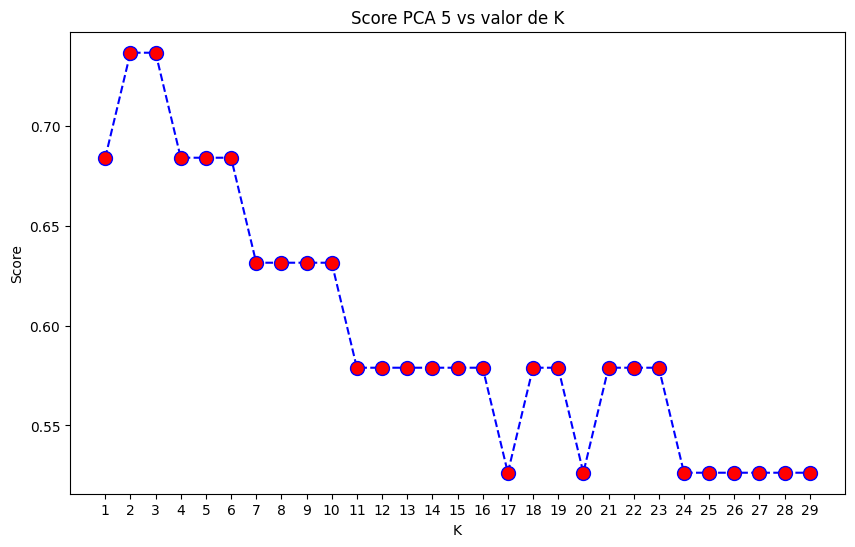

In [ ]:
score_pca_5 = []

for i in range(1,30):
  ## treine o modelo
  knn_plot = neighbors.KNeighborsClassifier(n_neighbors=i) # Initialize the model within the loop
  knn_plot.fit(X_train_pca_10, y_train_pca) # Use knn_plot to fit the model
  ## calcule as métricas
  s = knn_plot.score(X_test_pca_10, y_test_pca) # Use knn_plot to calculate the score
  ## armazene na lista score
  score_pca_5.append(s)
  print("k=", i)

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score_pca_5, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)

plt.xticks(range(1, 30, 1))
plt.title('Score PCA 5 vs valor de K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

Visto isso, seguiremos com o knn com as 10 melhores features selecionadas e com 5 vizinhos.

##Random Forest

Instancie e treine a Random Forest com os parâmetros default do algoritmo. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train_pca)
y_pred_rf = rf_model.predict(X_test_pca)

Exiba as métricas do Classification Report para o modelo Random Forest

In [ ]:
accuracy_rf = accuracy_score(y_test_pca, y_pred_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.2f}")

Acurácia da Random Forest: 0.74


In [ ]:
class_report_rf = classification_report(y_test_pca, y_pred_rf)
print("\nRelatório de Classificação:")
print(class_report_rf)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.75      1.00      0.86         9
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       0.00      0.00      0.00         1

    accuracy                           0.74        19
   macro avg       0.40      0.42      0.39        19
weighted avg       0.60      0.74      0.64        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plote a matriz de confusão.

<Figure size 1600x1200 with 0 Axes>

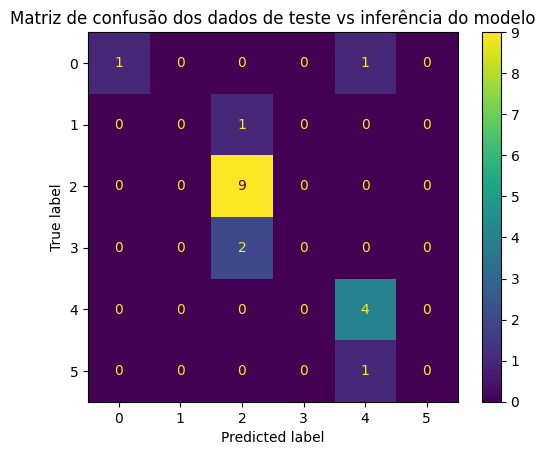

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test_pca, y_pred_rf)
classes = np.unique(y_test_pca)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

## Grid Search

Faça um grid search dos parâmetros da **Random Forest**:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
4. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Links de referência:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
2. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_pca, y_train_pca)

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados pelo Grid Search:")
print(best_params)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Melhores parâmetros encontrados pelo Grid Search:
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
579 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_pca)

In [ ]:
# Acurácia do melhor modelo
accuracy_best_rf = accuracy_score(y_test_pca, y_pred_best_rf)
print(f"Acurácia da Random Forest com Grid Search: {accuracy_best_rf:.2f}")

Acurácia da Random Forest com Grid Search: 0.68


In [ ]:
# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test_pca, y_pred_best_rf))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.73      0.89      0.80         9
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       0.00      0.00      0.00         1

    accuracy                           0.68        19
   macro avg       0.40      0.40      0.38        19
weighted avg       0.59      0.68      0.62        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1600x1200 with 0 Axes>

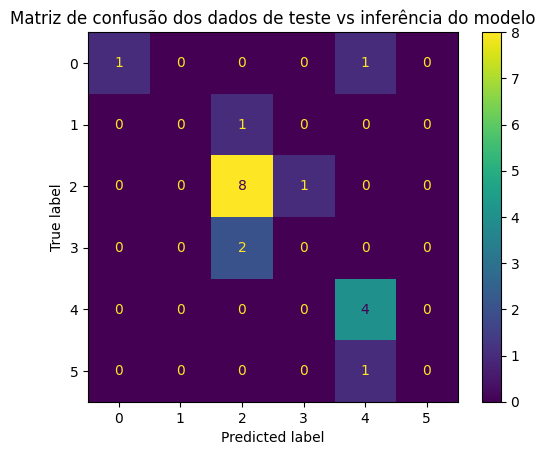

In [ ]:
# Matriz de Confusão
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test_pca, y_pred_best_rf)
classes = np.unique(y_test_pca)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

## Conclusão

Conseguimos obter uma boa acurácia de 84% utilizando o KNNClassifier nos dados originais, com um K = 5. O tratamento da base, a exclusão de features irrelevantes e a utilização da técnica de feature selection com o SelectKBest ajudou na seleção das features com correlação mais forte, melhorando o desempenho do modelo. Ao aplicar outras técnicas,
pudemos observar que a aplicação do PCA para redução de dimensionalidade para 15, 10 e 5 features não impactou positivamente a acurácia do modelo, onde obtivemos um resultado inferior. Da mesma maneira, o RandomForest não foi o suficiente para atingir o nível de acurácia do KNNClassifier, mesmo com o auxílio do GridSearch para selecionar os melhores parâmetros.

A quantidade limitada de dados pode ter influenciado na acurácia, já que o ideal é ter grandes quantidades para treinar de maneira eficiente os algoritmos. Ainda assim, o processo de experimentação se tornou útil para este projeto, onde pudemos comparar diferentes técnicas e chegar a um resultado satisfatório dentro do contexto dado.